In [ ]:
# KNN calssifier works by calculating the euclidiean distance or manhattan distance betwwen the query pount the datapoints
# Basing upon the distance it classifies wheather it belongs to category 1 or category 2

In [ ]:
# The k is the neighbours and it has to be selected by user inoder to specifies how many nearest neighbours to be compared with
# If in case 3 data points of category 1 is nearer to the quey point where in only 2 data points are nearer to category 2 
# Then the query point will be classified as Category 

In [ ]:
# The KNN gets effected by the unbalanced data and outliers 
# These have to be taken care care in EDA

# Agenda
 1. KNN (K Nearest Neighbor) Algorithm
 2. Objective of Classification Business Problem: Getting Probabilities or Class Labels
     * Probabilities : Metrics for model evaluation
     * Class Labels : Choosing the threshold with ROC-AUC Curve 

In [1]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

In [32]:
import numpy as np

In [2]:
iris_data = sns.load_dataset('iris')
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris_data['species'].value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

In [4]:
iris_data.describe().round()

,sepal_length,sepal_width,petal_length,petal_width
count,150.0,150.0,150.0,150.0
mean,6.0,3.0,4.0,1.0
std,1.0,0.0,2.0,1.0
min,4.0,2.0,1.0,0.0
25%,5.0,3.0,2.0,0.0
50%,6.0,3.0,4.0,1.0
75%,6.0,3.0,5.0,2.0
max,8.0,4.0,7.0,2.0


In [5]:
X = iris_data.iloc[:,:-1]
y = iris_data['species']

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=10)

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [9]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [15]:
y_test_pred=knn_model.predict(X_test)
y_test_pred

array(['versicolor', 'virginica', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'versicolor', 'setosa', 'setosa', 'setosa',
       'virginica', 'virginica', 'virginica', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'virginica'],
      dtype=object)

## Test performance

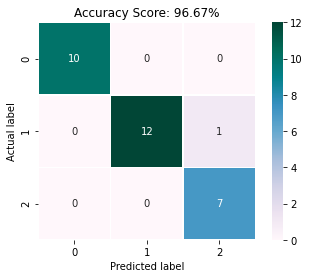

In [20]:
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,cmap='PuBuGn',linewidths=.5,square = True);
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Accuracy Score: "+str(round(knn_model.score(X_test,y_test)*100,2))+"%")
plt.show()

## Train Performance

In [23]:
y_train_pred=knn_model.predict(X_train)
y_train_pred

array(['versicolor', 'versicolor', 'virginica', 'virginica', 'virginica',
       'setosa', 'virginica', 'virginica', 'virginica', 'virginica',
       'setosa', 'setosa', 'versicolor', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'virginica', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'versicolor', 'setosa', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'setosa', 'setosa', 'setosa',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'setosa',
       'setosa', 'setosa', 'virginica', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'virginica', 'virginica',
       '

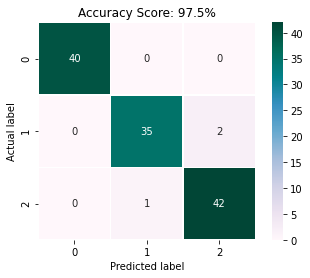

In [24]:
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True,cmap='PuBuGn',linewidths=.5,square = True);
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Accuracy Score: "+str(round(knn_model.score(X_train,y_train)*100,2))+"%")
plt.show()

In [ ]:
## The model is behaving well with train data as well as test data

## Selecting the value of K

In [ ]:
#--------Knowing the best value of k : Steps-----
# 1. Vary the value of k ( a for loop is required)
# 2. fit the model with that k value
# 3. Compute accuracy on train and test dataset, and also capture it
# 4. plot and compare

In [ ]:
# When we compare the y_train with y_train_pred or y_test with y_test_pred
# We get error asa well as accuracy
# How ?

## When we use ! it shows the Error

In [49]:
np.mean(y_test_pred!=y_test)

0.03333333333333333

## When we use == it shows the Accuracy

In [50]:
np.mean(y_test_pred==y_test)

0.9666666666666667

In [34]:
errors=[]
for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred=knn.predict(X_test)
    errors.append(np.mean(pred!=y_test))
    
print(errors)    

[0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03333333333333333, 0.03333333333333333, 0.0]


Text(0, 0.5, 'Error')

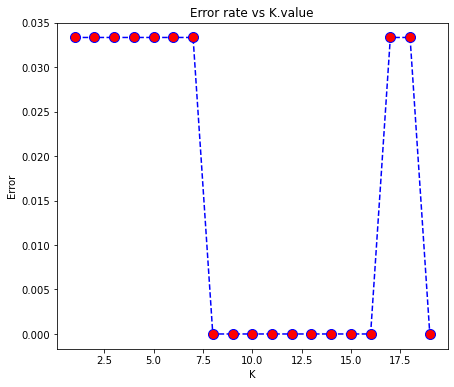

In [40]:
plt.figure(figsize=(7,6))
plt.plot(range(1,20),errors,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error rate vs K.value')
plt.xlabel('K')
plt.ylabel('Error')


In [41]:
all_train_errors = []
all_test_errors = []

for k in range(1,15):
    knn_model = KNeighborsClassifier(n_neighbors = k)
    knn_model.fit(X_train,y_train)
    
    y_train_predicted = knn_model.predict(X_train)
    y_test_predicted = knn_model.predict(X_test)
    
    train_error = (y_train_predicted!=y_train).mean()
    test_error = (y_test_predicted!=y_test).mean()
    
    all_train_errors.append(train_error)
    all_test_errors.append(test_error)


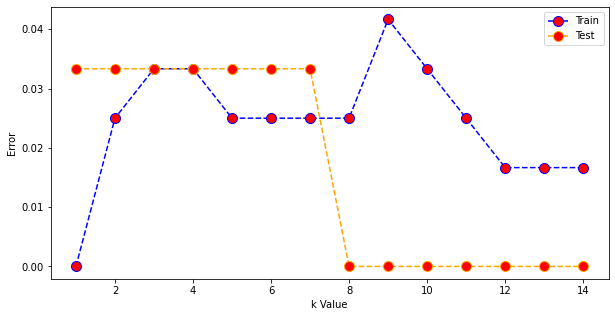

In [43]:
plt.figure(figsize=(10,5))
plt.plot(range(1,15),all_train_errors,label="Train",color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.plot(range(1,15),all_test_errors,label="Test",color='orange',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()
plt.show()

In [ ]:
# As the K value is increasing the error is decreasing and getting constant after 8 in test data and 12 for the train data

## Scaling for KNN

In [44]:
import random
dic = {'X1':range(10),
       'X2':[random.randint(100000,1000000) for i in range(10)]}
temp = pd.DataFrame(dic)
temp

,X1,X2
0,0,535482
1,1,348723
2,2,636011
3,3,101117
4,4,549645
5,5,100252
6,6,978113
7,7,259468
8,8,351448
9,9,152845


In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()
modified = scaler.fit_transform(temp)
modified

array([[-1.5666989 ,  0.50870441],
       [-1.21854359, -0.1993823 ],
       [-0.87038828,  0.88985472],
       [-0.52223297, -1.13816715],
       [-0.17407766,  0.56240267],
       [ 0.17407766, -1.14144675],
       [ 0.52223297,  2.18691607],
       [ 0.87038828, -0.53778784],
       [ 1.21854359, -0.18905061],
       [ 1.5666989 , -0.94204322]])

In [47]:
pd.DataFrame(modified).describe().round()

,0,1
count,10.0,10.0
mean,-0.0,-0.0
std,1.0,1.0
min,-2.0,-1.0
25%,-1.0,-1.0
50%,0.0,-0.0
75%,1.0,1.0
max,2.0,2.0
